Load and preparer the data. Remove dates from dataset for modeling

In [24]:
# Import important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
dataset = pd.read_csv('complete_gws.csv', encoding="ISO-8859-1")

#drop date columns
dataset.drop(["name","kickoff_time",'kickoff_time_formatted'], axis=1,inplace=True )

#set target y as goal_scored and X as every other column
# X = dataset.iloc[:67936,dataset.columns != 'goals_scored'].values
# y = dataset.iloc[:67936,dataset.columns == 'goals_scored'].values
from sklearn.impute import SimpleImputer
imputer =SimpleImputer (missing_values=np.nan , strategy='mean')
imputer.fit(X)
X=imputer.transform(X)
print(X)
X = dataset.iloc[:67936,dataset.columns != 'total_points'].values
y = dataset.iloc[:67936,dataset.columns == 'total_points'].values.flatten()

print(X,y)

/Users/suyash/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (12,30,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Split train and test data

In [20]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
# print(np.unique(y_test),len(X_train),len(y_train))

In [21]:
(dataset.columns).get_loc('total_points')
# (dataset.columns).get_loc('goals_scored')

44

Try linear regression

In [22]:
# Fitting Multiple linear regression to training set
from sklearn.linear_model import LinearRegression

mlrObj = LinearRegression()
mlrObj.fit(X_train,y_train)

#Predicting on the Test Set
y_pred = mlrObj.predict(X_test)

# print(mlrObj.coef_)
print("Max of weight:",np.amax(mlrObj.coef_))
"The weights of the parameters are:"
for idx, col_name in enumerate(dataset.columns[:44]):
    print("( {} ) {}:  {}".format(idx,col_name, mlrObj.coef_[idx]))
    
for idx, col_name in enumerate(dataset.columns[45:-1]):
    print("( {} ) {}:  {}".format((dataset.columns).get_loc(col_name),col_name, mlrObj.coef_[(dataset.columns).get_loc(col_name)]))
# Calculate the error

from sklearn import metrics

print("Mean Square Error:",metrics.mean_squared_error(y_test, y_pred))

Max of weight: 2.2714895282873235
( 0 ) assists:  1.3557388171854425
( 1 ) attempted_passes:  0.018104180969193095
( 2 ) big_chances_created:  -0.5548398602264791
( 3 ) big_chances_missed:  0.4911685802462159
( 4 ) bonus:  1.060892055804658
( 5 ) bps:  0.18106445381109712
( 6 ) clean_sheets:  1.0769883231210287
( 7 ) clearances_blocks_interceptions:  -0.08213432609974172
( 8 ) completed_passes:  -0.02977962017758672
( 9 ) creativity:  0.07870145334889905
( 10 ) dribbles:  -0.15523444805895492
( 11 ) ea_index:  1.4505629336580839e-11
( 12 ) element:  -3.348355437371442e-05
( 13 ) errors_leading_to_goal:  0.26287015068149017
( 14 ) errors_leading_to_goal_attempt:  0.14886749491143983
( 15 ) fixture:  -0.00030451269972445877
( 16 ) fouls:  0.17225050620007556
( 17 ) goals_conceded:  -0.24263863058147578
( 18 ) goals_scored:  1.1925171400812113
( 19 ) ict_index:  -0.7427191295408059
( 20 ) id:  -6.7683315410072e-06
( 21 ) influence:  0.07321134529934686
( 22 ) key_passes:  -0.2300345564300

In [23]:
import statsmodels.api as sm
X = np.append(arr=np.ones((len(X),1)).astype(int), values=X, axis=1)

print(X[:,[0,1,2,3,4,5]],(y[0]),type(X[0,3]),type(X[0,4]),type(X[0,5]))
X_sig = X[:,[1]]
obj_OLS = sm.OLS(endog = y, exog = X_sig).fit()
obj_OLS.summary()
print (obj_OLS.summary())

[[1 0 0 0 0 0.0]
 [1 0 3 0 0 0.0]
 [1 0 26 0 0 0.0]
 ...
 [1 0 0 0 0 0.0]
 [1 0 0 0 0 0.0]
 [1 0 31 0 0 0.0]] 0.0 <class 'int'> <class 'int'> <class 'float'>


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Logistic Regression

In [5]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Make a prediction
y_pred = classifierObj.predict(X_test)

# Find the misclassification rate
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

# print(cm)

print(classifierObj.score(X_test,y_test))

/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.10122172611746234


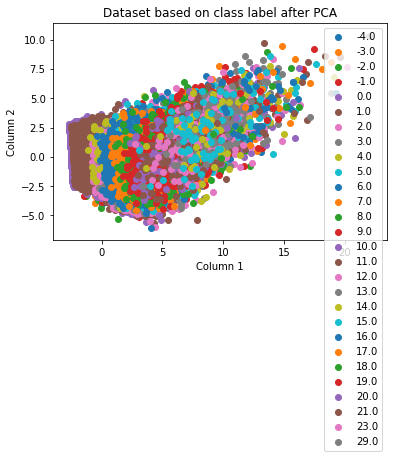

In [6]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
pcaObj = PCA(n_components=2)
X_set1, y_set1 = X_train, y_train
X_set1 = pcaObj.fit_transform(X_set1)
X_test_2n = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_


for i, j in enumerate(np.unique(y_set1)):
    plt.scatter(X_set1[(y_set1 == j).flatten(), 0], X_set1[(y_set1 == j).flatten(), 1],
                 label = j)    

plt.title('Dataset based on class label after PCA')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.legend()
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
classifierObj2 = LogisticRegression(random_state=0)
classifierObj2.fit(X_set1, y_set1)

log_accuracy=classifierObj2.score(X_test_2n,y_test)
print("The accuracy is:",log_accuracy)

/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy is: 0.6536970708012364


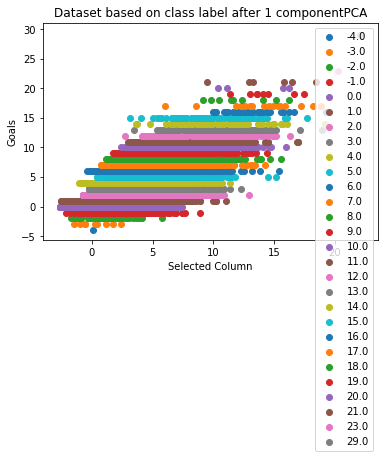

In [8]:
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=1)
X_set2, y_set2 = X_train, y_train
X_set2 = pcaObj.fit_transform(X_set2)
X_test_1n = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_

for i, j in enumerate(np.unique(y_set2)):
    plt.scatter(X_set2[y_set2 == j],y_set2[y_set2 == j], label = j)
plt.title('Dataset based on class label after 1 componentPCA')
plt.xlabel('Selected Column')
plt.ylabel('Goals')
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
classifierObj3 = LogisticRegression(random_state=0)
classifierObj3.fit(X_set2, y_set2)

log_accuracy=classifierObj3.score(X_test_1n,y_test)
print("The accuracy is:",log_accuracy)

/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suyash/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy is: 0.65197978509396


In [10]:
# from sklearn.decomposition import KernelPCA
# kernelPCAObj = KernelPCA(n_components=3, kernel='rbf')
# X_set4, y_set4 = X_train, y_train
# X_set4 = kernelPCAObj.fit_transform(X_set4)
# X_test_kpca = kernelPCAObj.transform(X_test)

# X1, X2 = np.meshgrid(np.arange(start = X_set4[:, 0].min() - 1, stop = X_set4[:, 0].max() + 1, step = 0.01),
#                      np.arange(start = X_set4[:, 1].min() - 1, stop = X_set4[:, 1].max() + 1, step = 0.01))

# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set4)):
#     plt.scatter(X_set4[y_set4 == j, 0], X_set4[y_set4 == j, 1],
#                 c = ListedColormap(('red', 'green'))(i), label = j)    

# plt.title('Dataset based on class label after KernalPCA')
# plt.xlabel('Column 1')
# plt.ylabel('Column 2')
# plt.legend()
# plt.show()

In [11]:
print(dataset.columns)

Index(['assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'loaned_in', 'loaned_out', 'minutes', 'offside', 'open_play_crosses',
       'opponent_team', 'own_goals', 'penalties_conceded', 'penalties_missed',
       'penalties_saved', 'recoveries', 'red_cards', 'round', 'saves',
       'selected', 'tackled', 'tackles', 'target_missed', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'winning_goals',
       'yellow_cards'],
      dtype='object')


Data analysis

total_points
-4.0         2
-3.0        14
-2.0        78
-1.0       233
 0.0     38030
 1.0     10247
 2.0      8915
 3.0      2476
 4.0       560
 5.0      1154
 6.0      2415
 7.0      1006
 8.0       855
 9.0       591
 10.0      336
 11.0      277
 12.0      215
 13.0      186
 14.0       96
 15.0      125
 16.0       56
 17.0       24
 18.0       15
 19.0        9
 20.0        6
 21.0       11
 23.0        2
 24.0        1
 29.0        1
Name: element, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f63fd68>]],
      dtype=object)

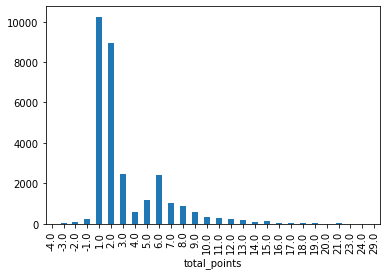

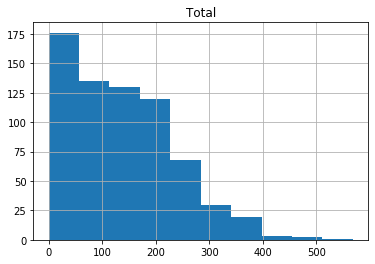

In [12]:

#group by total points to see what is the most frequently scored points
by_total=dataset.groupby('total_points')
ids_grouped_by_total_points=by_total.count().element

print(ids_grouped_by_total_points)

#plot everything exept 0 to get a better view
ids_grouped_by_total_points[ids_grouped_by_total_points<38030].plot(kind='bar')

#group by players to get the sum of total_points per player

by_ids=dataset.groupby('element')
total_points_grouped_by_ids=by_ids['total_points'].sum().reset_index(name ='Total')

#again group by total to see the spread of player with total total_points
group_by_total_points=total_points_grouped_by_ids.groupby('Total').count().element
total_points_grouped_by_ids.hist(column='Total')